# Mall Customer Segmentation Analysis

# Conclusion :-> 

In [ ]:
#How to group customers based on their behaviours usning K-Mean Clustering
#This is a variable technique used by business to targrting & marketing optimized services & improve cutomer satisfaction

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# StandardScaller

In [ ]:
#to make sure all columns have similar importance { income = 100000, 25000,... but member year = 2,4,1...}
#scale the features
#scaller = StandardScaler()
# df_scaled= scaler.fit_transform(df)
# mean=0,  standard deviation =1
# making them easier for the algorithn to handle

# convert back to DataFrame
# df_scaled= pd.DataFrame(df_scaled, columsn= df.columns)

In [28]:
from sklearn.preprocessing import StandardScaler

# suppress warnings for cleaner output

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
df= pd.read_csv("mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# df.rename(columns={"wrong_column_name" : "new_clm_name"}, implace = true)

In [31]:
df.shape

(200, 5)

In [32]:
df.info()
# df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [33]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [34]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [35]:
df.drop(["CustomerID"],axis=1, inplace=True)
#error because i run this command again, 
#that column has already dropped when i run this command first time

# now error is not showing because i started all abode code again froam starting

# use one hot encoding for the gender column

In [36]:
#df= pd.get_dummies(df, columns=["Gender"], drop_first=False)

# i was doing it here but for that i need to change full further code because i completed project without hot encoding
# but now i added it in last just before finding summary

In [37]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


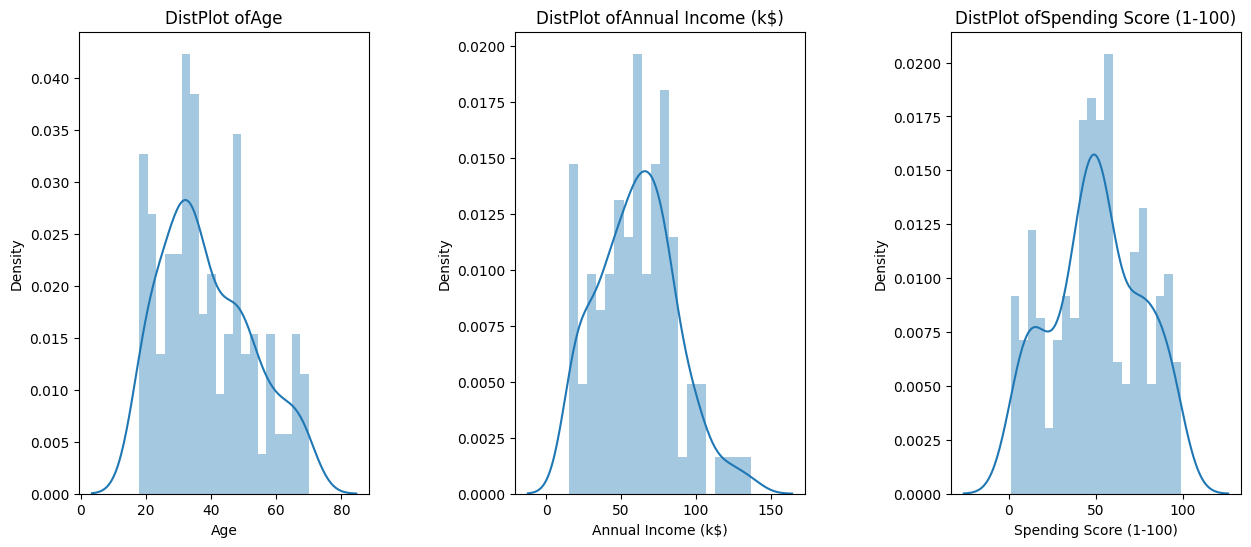

In [38]:
plt.figure(1,figsize=(15,6))
n=0;
for x in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5, wspace= 0.5)
    sns.distplot(df[x], bins=20)
    plt.title("DistPlot of{}".format(x))
plt.show()

#here warning came but after imopoting warning and using that, and re run this code warning suppressed

In [ ]:
# all below problem happened because after completeing whole project i need to find summary and for that i need to do hot encoding og gender column
# which was not done yet and for that i encoded in between and whole code need to change
# but now restored old code and added hot encoding code in last

In [ ]:
# sorry i tried but was not able to understand how it is working

# Sorry again, i add hot encoding on gender in between after completing my whole project, but due toi this i need to change all further code
# so again i commited that hot encoding code and runniig all codes again

In [39]:
#plt.figure(figsize=(15,5))
#sns.countplot(y="Gender", data=df)
#plt.show()

#above line decoded bacuse i encoded gender column

#plt.figure(figsize=(15, 5))
#sns.countplot(y="Gender_Male", data=df, color='blue', label='Male')
#sns.countplot(y="Gender_Female", data=df, color='green', label='Female')
#plt.legend()
#plt.show()

In [40]:
# Calculate counts for each gender
#male_count = df['Gender_Male'].sum()
#female_count = df['Gender_Female'].sum()

# Create a DataFrame for plotting
#gender_counts = pd.DataFrame({
#    'Gender': ['Male', 'Female'],
#     'Count': [male_count, female_count]
# })

# # Plotting
# plt.figure(figsize=(15, 5))
# sns.barplot(x='Gender', y='Count', data=gender_counts, palette='muted')
# plt.title('Gender Counts')
# plt.xlabel('Gender')
# plt.ylabel('Count')
# plt.show()

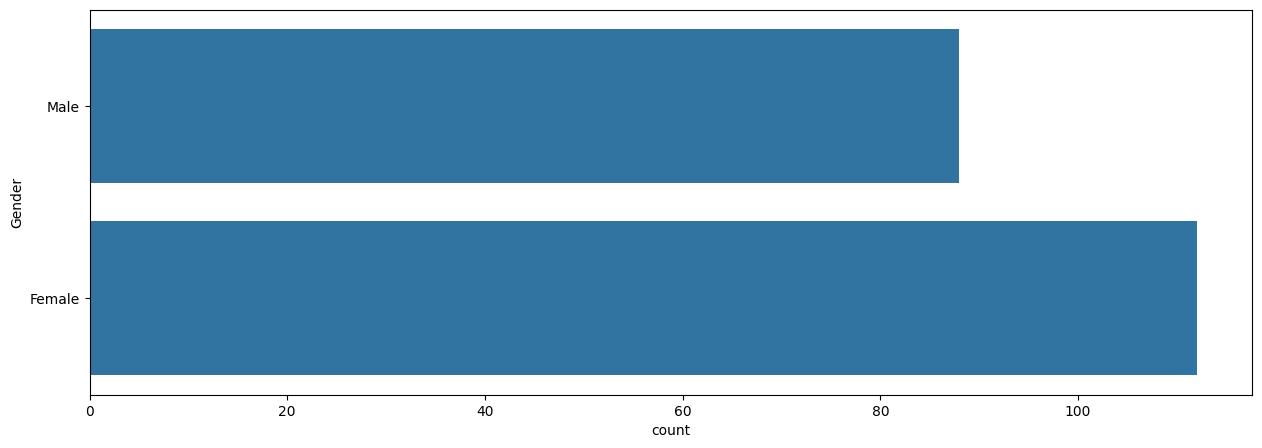

In [41]:
plt.figure(figsize=(15,5))
sns.countplot(y="Gender", data=df)
plt.show()

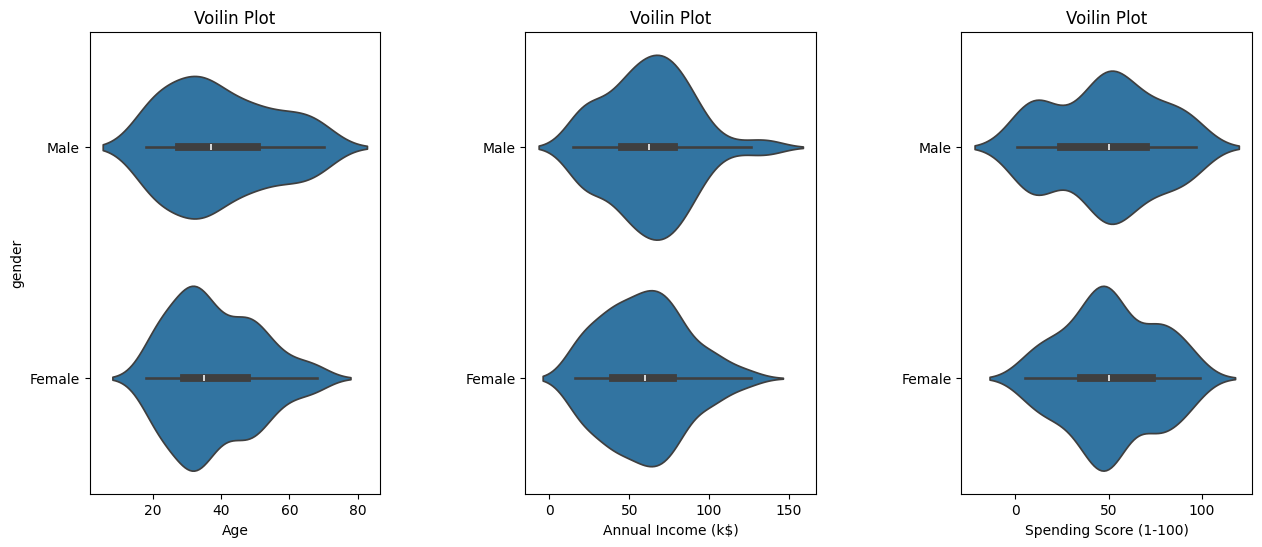

In [42]:
plt.figure(1,figsize=(15,6))
n=0;
for cols in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5, wspace= 0.5)
    sns.violinplot(x= cols, y="Gender", data=df)
    plt.ylabel("gender" if n==1 else "")
    plt.title("Voilin Plot")
plt.show()

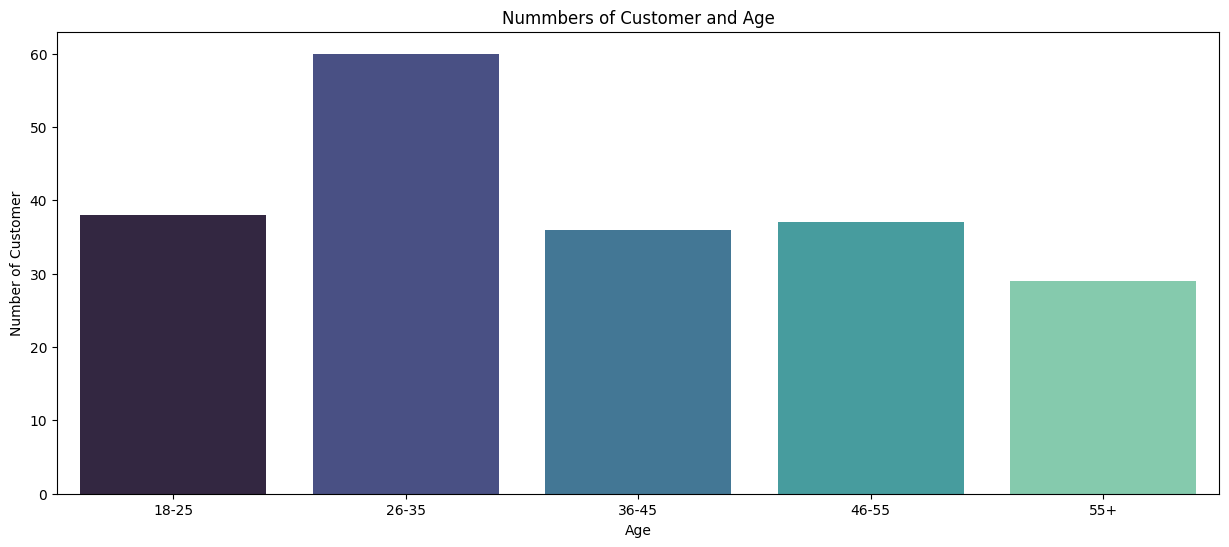

In [43]:
age_18_25= df.Age[(df.Age>=18) & (df.Age<=25)]
age_26_35= df.Age[(df.Age>=26) & (df.Age<=35)]
age_36_45= df.Age[(df.Age>=36) & (df.Age<=45)]
age_46_55= df.Age[(df.Age>=46) & (df.Age<=55)]
age_55above= df.Age[df.Age>=56]

agex= ["18-25","26-35","36-45","46-55","55+"]
agey= [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette="mako")
plt.title("Nummbers of Customer and Age")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

# here also warning came something about .... i do not remember but after re run warning got suppressed because importing warning and use

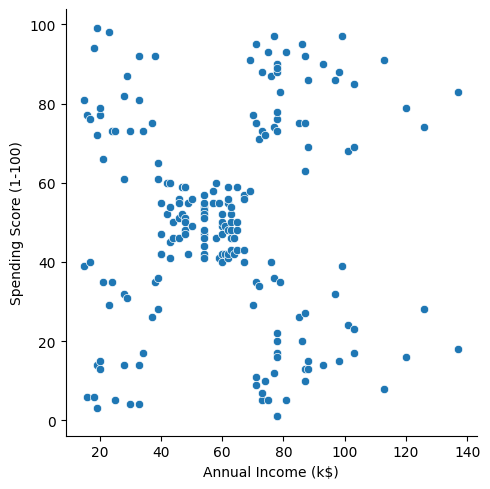

In [44]:
sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)

In [45]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


# using elbow method to find the optimal number of clusters

In [46]:
#wcss= within clusters sum of squares
# less the wcss more dense the points in scatter plot

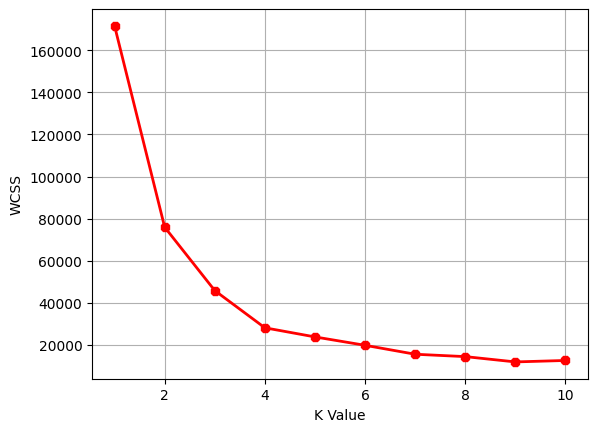

In [47]:
x1= df.loc[:,["Age","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss= []
for k in range(1,11):
    kmeans= KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [48]:
kmeans= KMeans(n_clusters=4)
label= kmeans.fit_predict(x1)
print(label)

[3 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 3 3 1 2 3 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1
 2 1 2 0 2 0 3 1 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 2 3 2 0 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 3
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [49]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]]


# Plotting Clusters of Customers

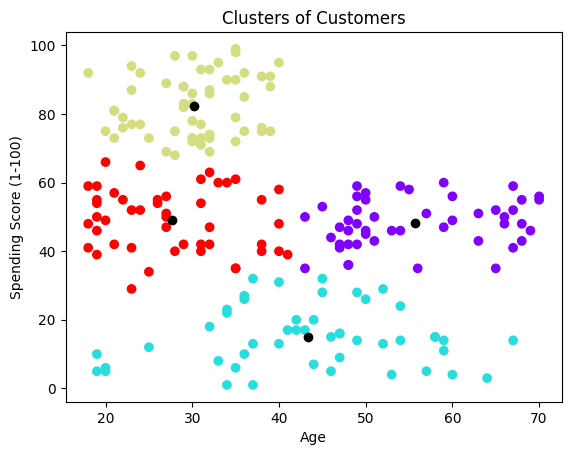

In [51]:
plt.scatter(x1[:,0],x1[:,1], c= kmeans.labels_, cmap= "rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")
plt.title("Clusters of Customers")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

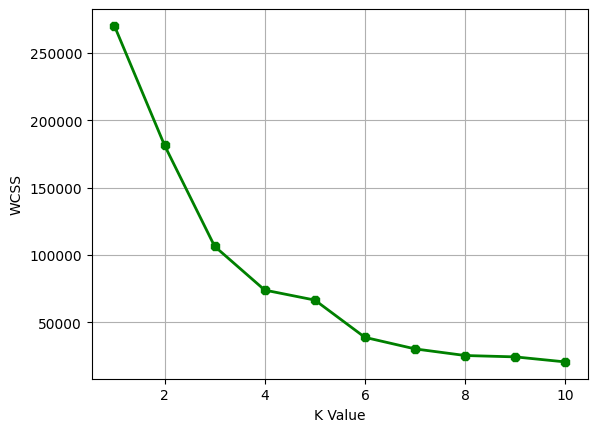

In [61]:
x2= df.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values

wcss= []
for k in range(1,11):
    kmeans= KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="green", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [62]:
kmeans= KMeans(n_clusters=5)
label= kmeans.fit_predict(x2)
print(label)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [63]:
print(kmeans.cluster_centers_)

[[86.53846154 82.12820513]
 [55.0875     49.7125    ]
 [87.75       17.58333333]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


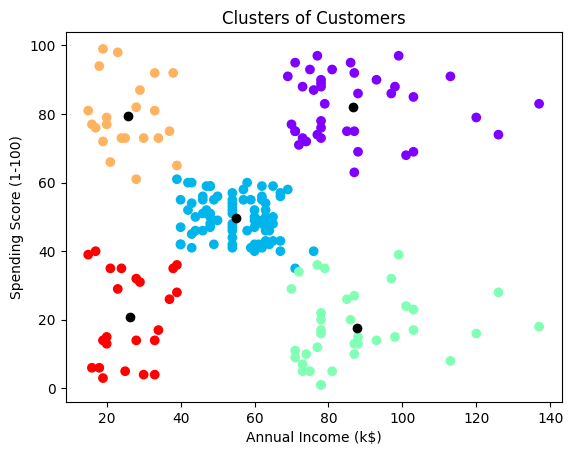

In [64]:
plt.scatter(x2[:,0],x2[:,1], c= kmeans.labels_, cmap= "rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

# For 3D cluster plotting

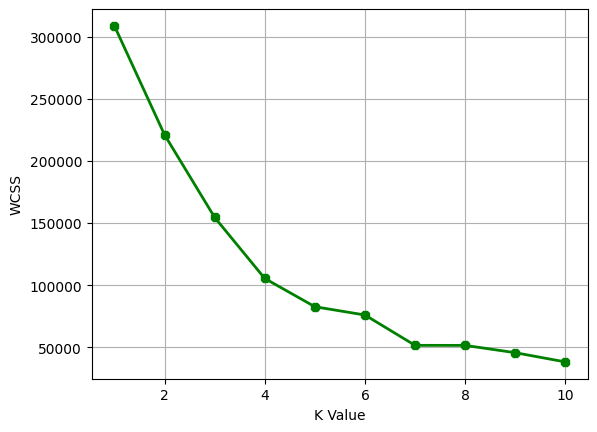

In [65]:
x3= df.iloc[:,1:]
wcss= []
for k in range(1,11):
    kmeans= KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="green", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [66]:
kmeans= KMeans(n_clusters=6)
label= kmeans.fit_predict(x3)
print(label)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 5 4 0 2 0 4 5 2 2 2 5 2 2 5 5 5 5 5 2 5 5 2 5 5 5 2 5 5 2 2 5 5 5 5
 5 2 5 2 2 5 5 2 5 5 2 5 5 2 2 5 5 2 5 2 2 2 5 2 5 2 2 5 5 2 5 2 5 5 5 5 5
 2 2 2 2 2 5 5 5 5 2 2 2 1 2 1 3 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [67]:
print(kmeans.cluster_centers_)

[[44.31818182 25.77272727 20.27272727]
 [32.69230769 86.53846154 82.12820513]
 [27.         56.65789474 49.13157895]
 [41.68571429 88.22857143 17.28571429]
 [25.27272727 25.72727273 79.36363636]
 [56.34090909 53.70454545 49.38636364]]


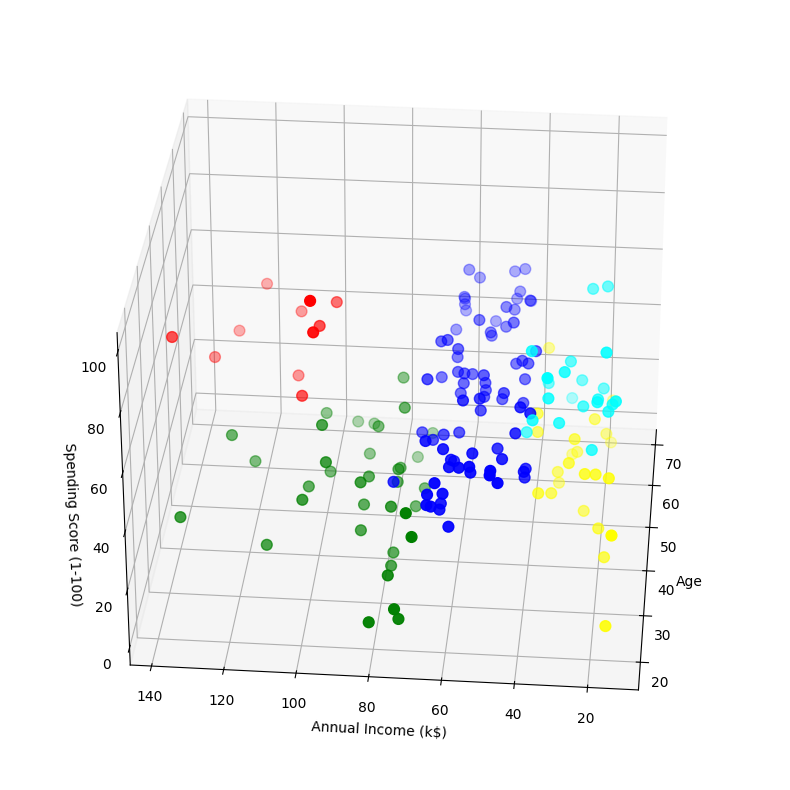

In [68]:
 clusters= kmeans.fit_predict(x3)
df["label"]= clusters

from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(20,10))
ax= fig.add_subplot(111, projection="3d")
ax.scatter(df.Age[df.label==0],df["Annual Income (k$)"][df.label==0], df["Spending Score (1-100)"][df.label==0], color="red", s=60)
ax.scatter(df.Age[df.label==1],df["Annual Income (k$)"][df.label==1], df["Spending Score (1-100)"][df.label==1], color="blue", s=60)
ax.scatter(df.Age[df.label==2],df["Annual Income (k$)"][df.label==2], df["Spending Score (1-100)"][df.label==2], color="green", s=60)
ax.scatter(df.Age[df.label==3],df["Annual Income (k$)"][df.label==3], df["Spending Score (1-100)"][df.label==3], color="cyan", s=60)
ax.scatter(df.Age[df.label==4],df["Annual Income (k$)"][df.label==4], df["Spending Score (1-100)"][df.label==4], color="yellow", s=60)
ax.view_init(30,185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

plt.show()

In [69]:
print(df.columns)

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'label'],
      dtype='object')


In [70]:
df= pd.get_dummies(df, columns=["Gender"], drop_first=False)

In [ ]:
# to run this i will need to do hot encoding of gender column , because of which i will need to change full code

In [ ]:
# sorry i was doing hot encoding in between because of which i need to change full further code , 
# but now i added it in last so no problem in whole project

In [71]:
cluster_summary= df.groupby("label").mean()
print(cluster_summary)

             Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female  \
label                                                                         
0      32.454545          108.181818               82.727273       0.545455   
1      42.937500           55.087500               49.712500       0.587500   
2      40.666667           87.750000               17.583333       0.472222   
3      25.272727           25.727273               79.363636       0.590909   
4      45.217391           26.304348               20.913043       0.608696   
5      32.785714           78.035714               81.892857       0.535714   

       Gender_Male  
label               
0         0.454545  
1         0.412500  
2         0.527778  
3         0.409091  
4         0.391304  
5         0.464286  
